In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import linalg

start
start
start
start
start
start
start
start


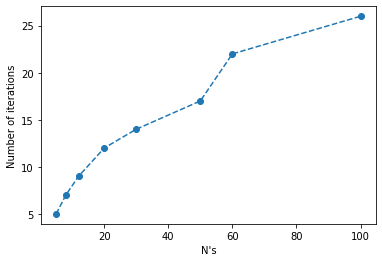

[5, 7, 9, 12, 14, 17, 22, 26]


In [10]:
def hilbert_matrix(n):
    return np.array([[1/(i + j - 1) for j in range(1, n+1)] for i in range(1, n+1)])

def conjugate_grad(A, b, maxiter = 10000):
    n = A.shape[0]
    x = np.zeros(n)
    r = b - A@x
    p = -r.copy()
    r_old = np.inner(r,r)
    iter_num = 0
    alpha = r_old / np.inner(p, A@p)
    print('start')
    results = []
    while iter_num<maxiter:
        iter_num += 1
        # alpha = r_old / np.inner(p, A@p)
        x = x + alpha * p
        r = r + alpha * A@p
        r_new = np.inner(r, r)
        if r_new < 10**-6 :
            results.append(iter_num)
            return iter_num
        beta = r_new / r_old
        # if np.linalg.norm(A@x-beta)/np.linalg.norm(beta)<10**-6:
        #     results.append(iter_num)
        #     return iter_num
        p = -r + beta * p
        r_old = r_new.copy()
        alpha = r_old / np.inner(p, A@p)
        # print(f'Iteration: {iter_num},  x= {x},r={r_new}')
    return iter_num

# Set up the problem with n=5,8,12,20,30
ns = [5,8,12,20,30,50,60,100]
res = []
for n in ns:
    Q = hilbert_matrix(n)
    b = np.ones(n)
    iters = conjugate_grad(Q,b)    
    res.append(int(iters))

plt.plot(ns, res,'o',linestyle = 'dashed')
plt.xlabel("N's")
plt.ylabel("Number of iterations")
plt.show()

print(res)